<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/My_of_DZ_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/House_Rent_Dataset.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

In [100]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,NaN,NaN,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,NaN
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,NaN,2.0,7500.0,850.0,1 out of 2,Carpet Area,NaN,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [101]:
#  df = df[['Size', 'Furnishing Status', 'City', 'Rent']]
#  df.head()

In [102]:
df.shape


(4746, 12)

# Завдання 1
Ввиведіть основні числові характеристики даних, розділіть на тренувальну та тестову чатини. Цільова ознака `Rent`

In [103]:
df = df[df['Rent'] < 750000]
df = df[df['Size'] < 6000]

df.describe()

,BHK,Rent,Size,Bathroom
count,3710.000000,4045.000000,4045.000000,3736.000000
mean,2.081402,33154.252163,962.340667,1.968683
std,0.824833,52390.749107,613.666899,0.883788
min,1.000000,1200.000000,10.000000,1.000000
25%,2.000000,10000.000000,550.000000,1.000000
50%,2.000000,16000.000000,850.000000,2.000000
75%,3.000000,32000.000000,1200.000000,2.000000
max,6.000000,680000.000000,5700.000000,7.000000


<Axes: >

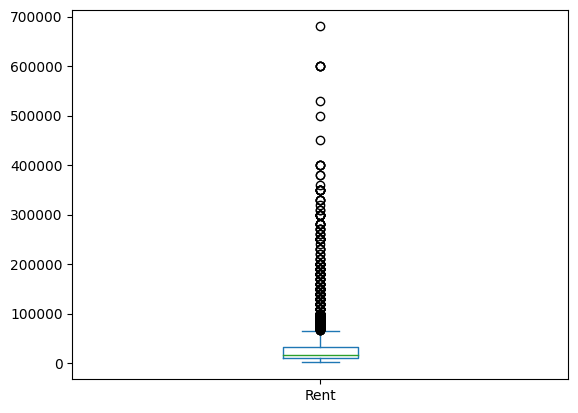

In [ ]:
df['Rent'].plot(kind='box')

<Axes: >

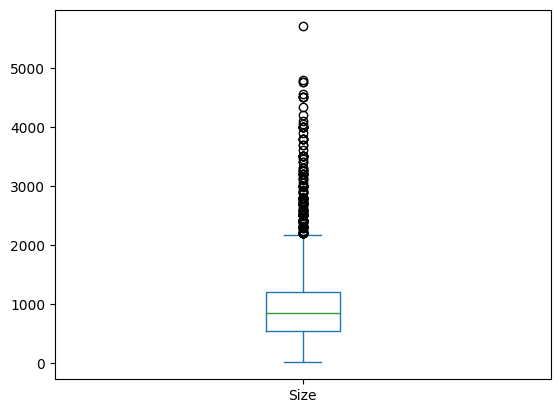

In [ ]:
df['Size'].plot(kind='box')

In [104]:
X = df.drop(columns='Rent')
y = df['Rent']

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    random_state=42)

In [106]:
X_test.shape

(1214, 11)

# Завдання 2
Створіть Pipeline для обробки числових стовпчиків(заповнення пропусків)

In [107]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

num_transformer = Pipeline(
    steps=[('impute', SimpleImputer(strategy='mean')),
          #  ('scale', StandardScaler()),
          #  ('poly', PolynomialFeatures(degree=4))
    ]
)

# Завдання 3
Створіть Pipeline для обробки категоріальних стовпчиків(заповнення пропусків та кодування)

In [108]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cat_transformer = Pipeline(
    steps=[('impute', SimpleImputer(strategy='most_frequent')),
           ('onehot', OneHotEncoder(sparse_output=False,
                                    handle_unknown='ignore'))
            # ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value',
            #                            unknown_value=100))
        ]
)

# Завдання 4
Об'єднайте попередні Pipeline в один ColumnTransformer

In [109]:
from sklearn.compose import ColumnTransformer


num_columns = X.select_dtypes(include='number').columns
cat_columns = X.select_dtypes(include='object').columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_columns),
        ('cat', cat_transformer, cat_columns)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])

# Завдання 5
Створіть остаточну модель та натренуйте її

In [110]:
from sklearn.linear_model import LinearRegression

model = Pipeline(
    steps=[('prep', preprocessor),
           ('model', LinearRegression())]
)

model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [111]:
model['prep'].set_output(transform='pandas')
model['prep'].transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


,num__BHK,num__Size,num__Bathroom,cat__Posted On_2022-04-23,cat__Posted On_2022-04-24,cat__Posted On_2022-04-25,cat__Posted On_2022-04-26,cat__Posted On_2022-04-27,cat__Posted On_2022-04-28,cat__Posted On_2022-04-29,...,cat__City_Mumbai,cat__Furnishing Status_Furnished,cat__Furnishing Status_Semi-Furnished,cat__Furnishing Status_Unfurnished,cat__Tenant Preferred_Bachelors,cat__Tenant Preferred_Bachelors/Family,cat__Tenant Preferred_Family,cat__Point of Contact_Contact Agent,cat__Point of Contact_Contact Builder,cat__Point of Contact_Contact Owner
1922,1.0,650.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4525,2.0,90.0,1.965779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2865,2.0,680.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2022,1.0,500.0,1.965779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
254,3.0,1000.0,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,1.0,520.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1513,2.0,700.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
994,4.0,1400.0,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4102,2.0,1000.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


# Завдання 6
Виведіть основні метрики моделі

In [112]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  #df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [113]:
all_metrics = pd.DataFrame()

y_pred = model.predict(X_train)
all_metrics['train'] = get_metrics(y_train, y_pred)

y_pred = model.predict(X_test)
all_metrics['test'] = get_metrics(y_test, y_pred)

all_metrics

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,train,test
MAE,5629.61,21552.16
RMSE,12773.88,41129.17
R2,0.94,0.37


# Завдання 7
Збережіть модель, завантажте її та спрогнозуйте ціну автомобіля

In [116]:
data = pd.DataFrame({
    'Size': [900],
    'Furnishing Status': ['Semi-Furnished'],
    'City': ['Mumbai'],
    'Area Locality': ['Dumdum Park'],
    'Floor': ["1 out of 3"],
    'Area Type': ['Super Area'],
    'Point of Contact': ['Contact Agent'],
    'Posted On': ['2022-05-13'],
    'Tenant Preferred': ['Family'],
    'BHK': [3.0],
    'Bathroom': [1.965779	]
})

data

,Size,Furnishing Status,City,Area Locality,Floor,Area Type,Point of Contact,Posted On,Tenant Preferred,BHK,Bathroom
0,900,Semi-Furnished,Mumbai,Dumdum Park,1 out of 3,Super Area,Contact Agent,2022-05-13,Family,3.0,1.965779


In [117]:
model.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([46151.7650045])